/tmp/ipykernel_6706/1953710633.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data.index = pd.to_datetime(data['id'], errors='ignore')
/tmp/ipykernel_6706/1953710633.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data.index = data['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))


Matriz de Correlação com 'ws100' não decomposto:
humid_trend            -0.448464
humid_seasonal         -0.000044
humid_resid            -0.050241
temp_trend              0.277288
temp_seasonal           0.000048
temp_resid              0.037820
verts100_trend         -0.082648
verts100_seasonal      -0.000001
verts100_resid          0.003094
vertdisp100_trend       0.420196
vertdisp100_seasonal    0.000071
vertdisp100_resid       0.011812
wdisp100_trend          0.656522
wdisp100_seasonal      -0.000003
wdisp100_resid          0.013916
wdir100_trend           0.183066
wdir100_seasonal       -0.000057
wdir100_resid          -0.010567
Name: ws100_trend, dtype: float64


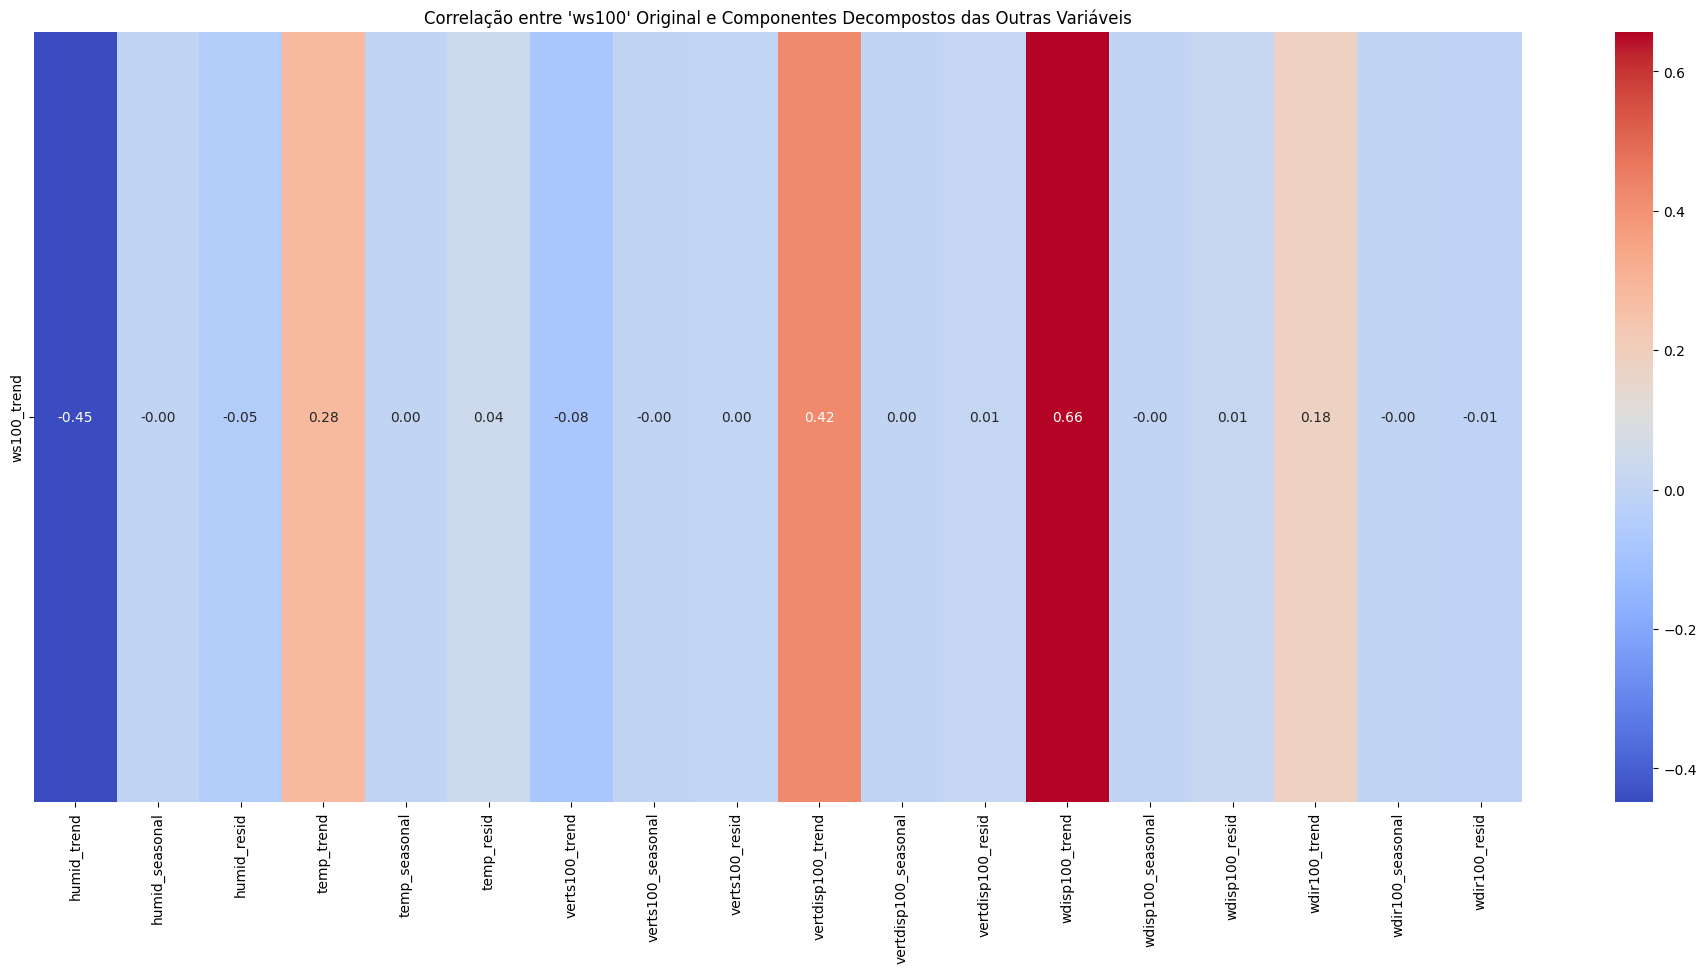

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("dataset.csv")

data.index = pd.to_datetime(data['id'], errors='ignore')
data.index = data['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))
variables = ['ws100', 'humid', 'temp', 'verts100', 'vertdisp100', 'wdisp100', 'wdir100']
components = pd.DataFrame(index=data.index)

for col in variables:
    if col in data.columns:
        series = data[col].dropna()
        
        if len(series) < 2 * 144:
            raise ValueError(f"A série {col} não tem dados suficientes para decomposição.")
        
        period = 6  
        
        decomposition = seasonal_decompose(series, model='additive', period=period, extrapolate_trend='freq')
        
        components[f'{col}_trend'] = decomposition.trend
        components[f'{col}_seasonal'] = decomposition.seasonal
        components[f'{col}_resid'] = decomposition.resid
    else:
        raise ValueError(f"A coluna {col} não existe no dataset.")

components.dropna(inplace=True)

ws100_series = components['ws100_trend']

decomposed_vars = [col for col in components.columns if 'ws100' not in col]

combined = pd.concat([ws100_series, components[decomposed_vars]], axis=1)

combined.dropna(inplace=True)

correlation_matrix = combined.corr()

print("Matriz de Correlação com 'ws100' não decomposto:")
print(correlation_matrix.loc['ws100_trend', decomposed_vars])

plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix.loc[['ws100_trend'], decomposed_vars], annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlação entre 'ws100' Original e Componentes Decompostos das Outras Variáveis")
plt.show()